Средняя абсолютная ошибка (MAE): 0.06757964789495305
Коэффициент детерминации (R²): 0.4885240842784807
     Название планеты  Фактическое значение ESI  Предсказанное значение ESI
0           TOI-904 c                      0.66                    0.471441
1           TOI-700 e                      0.91                    0.423845
2            GJ 357 d                      0.58                    0.383882
3           GJ 3293 d                      0.63                    0.270078
4            GJ 180 c                      0.70                    0.277581
5            GJ 433 d                      0.74                    0.282202
6          LP 890-9 c                      0.89                    0.432788
7          LHS 1140 b                      0.66                    0.472331
8  Teegarden's Star b                      0.97                    0.365133
9  Teegarden's Star c                      0.66                    0.378604


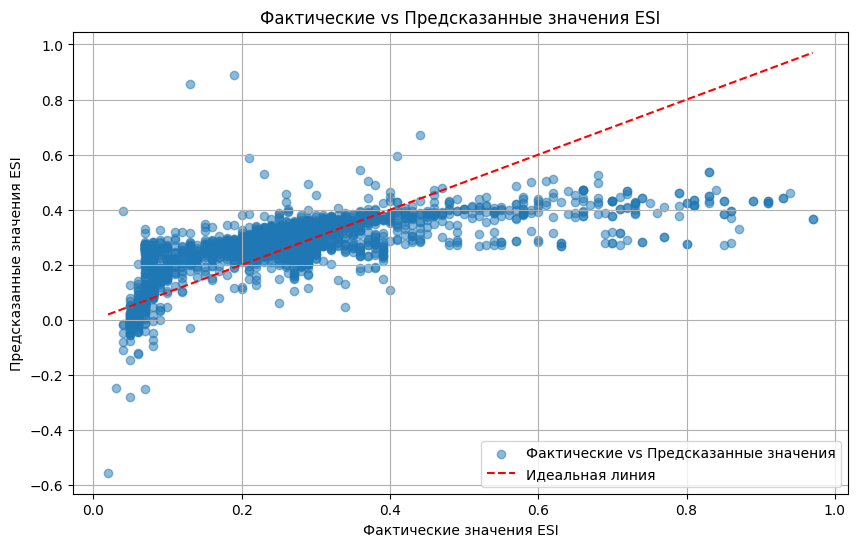

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('planet_data.csv')

columns_to_drop = [col for col in df.columns if 'Jupiter' in col or 'Mjup' in col]
df = df.drop(columns=columns_to_drop)

planet_names = df['Название планеты']

df_numeric = df.select_dtypes(include=['float64', 'int64', 'int32'])
df_numeric.fillna(df_numeric.mean(), inplace=True)

y = df_numeric['ESI']
X = df_numeric.drop(columns=['ESI'])

X_ones = np.hstack([np.ones((X.shape[0], 1)), X])

beta = np.linalg.inv(X_ones.T @ X_ones) @ X_ones.T @ y

y_pred = X_ones @ beta

comparison = pd.DataFrame({
    'Название планеты': planet_names,
    'Фактическое значение ESI': y,
    'Предсказанное значение ESI': y_pred
})

mae = np.mean(np.abs(comparison['Фактическое значение ESI'] - comparison['Предсказанное значение ESI']))
r_squared = 1 - (np.sum((comparison['Фактическое значение ESI'] - comparison['Предсказанное значение ESI']) ** 2) /
                 np.sum((comparison['Фактическое значение ESI'] - np.mean(comparison['Фактическое значение ESI'])) ** 2))

print(f"Средняя абсолютная ошибка (MAE): {mae}")
print(f"Коэффициент детерминации (R²): {r_squared}")

print(comparison.head(10))

plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5, label='Фактические vs Предсказанные значения')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Идеальная линия')
plt.title('Фактические vs Предсказанные значения ESI')
plt.xlabel('Фактические значения ESI')
plt.ylabel('Предсказанные значения ESI')
plt.grid(True)
plt.legend()
plt.show()

# Средняя абсолютная ошибка (MAE): 0.06757964789495305
# Коэффициент детерминации (R²): 0.4885240842784807

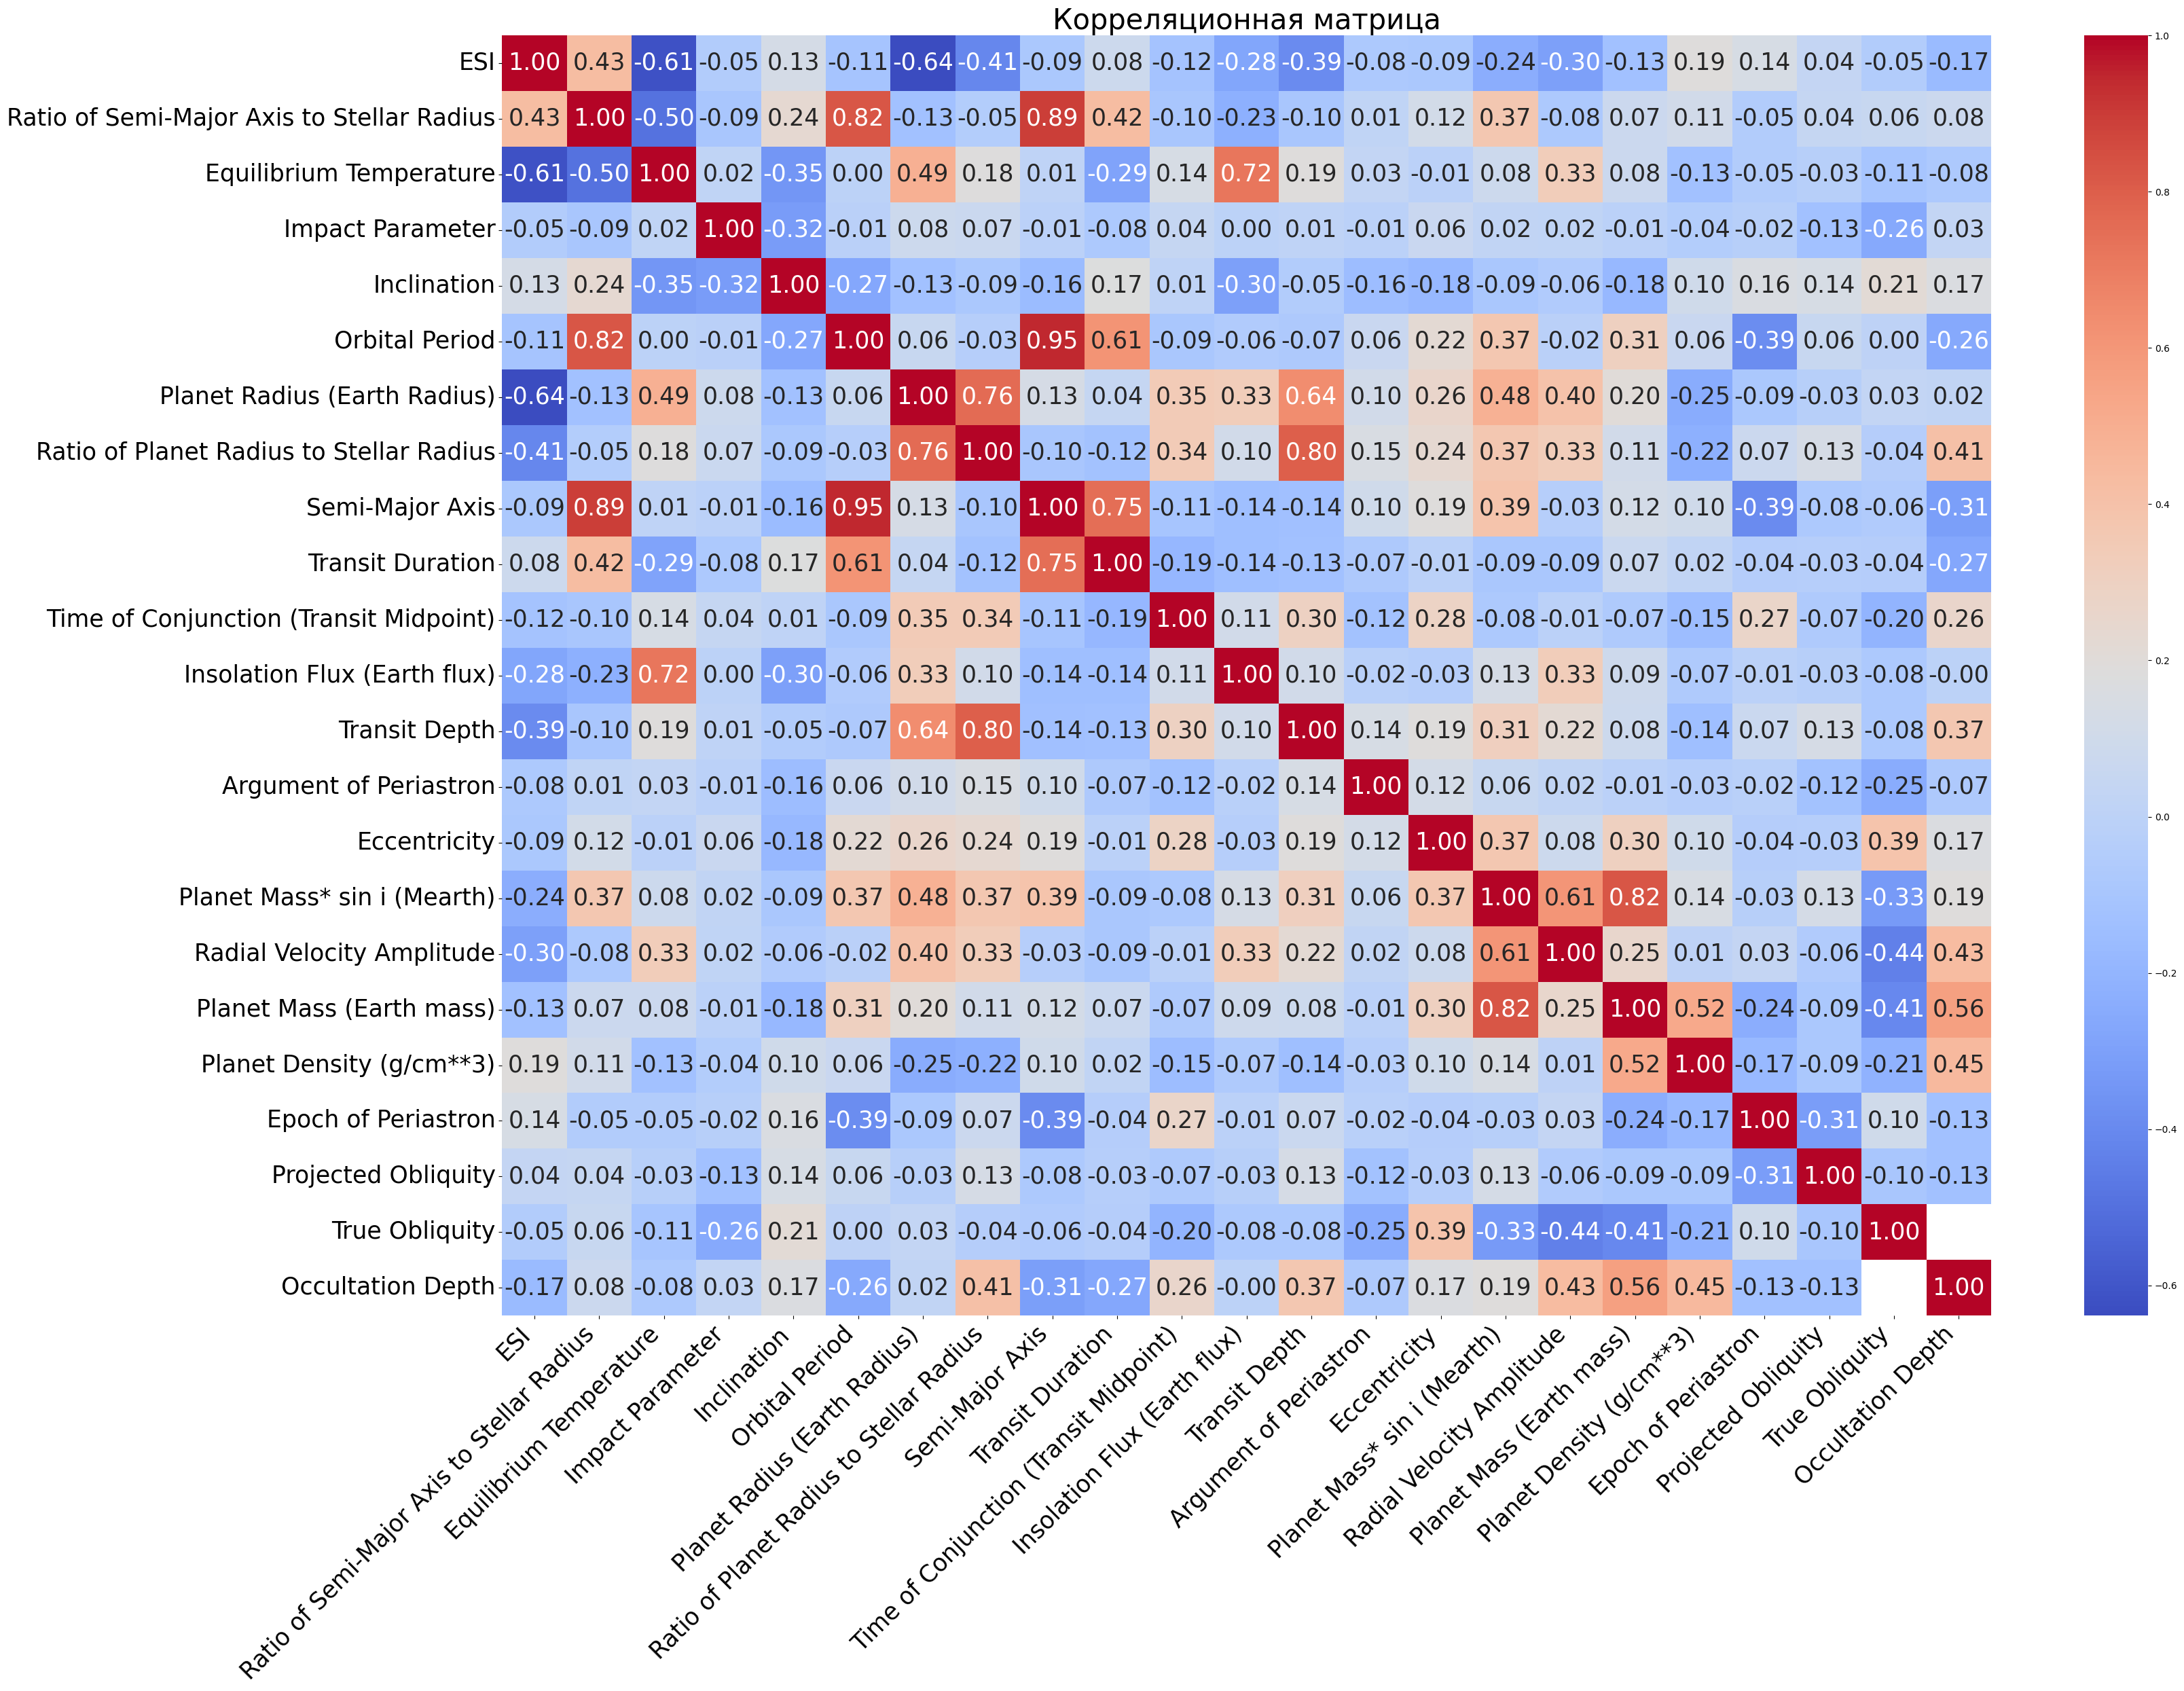

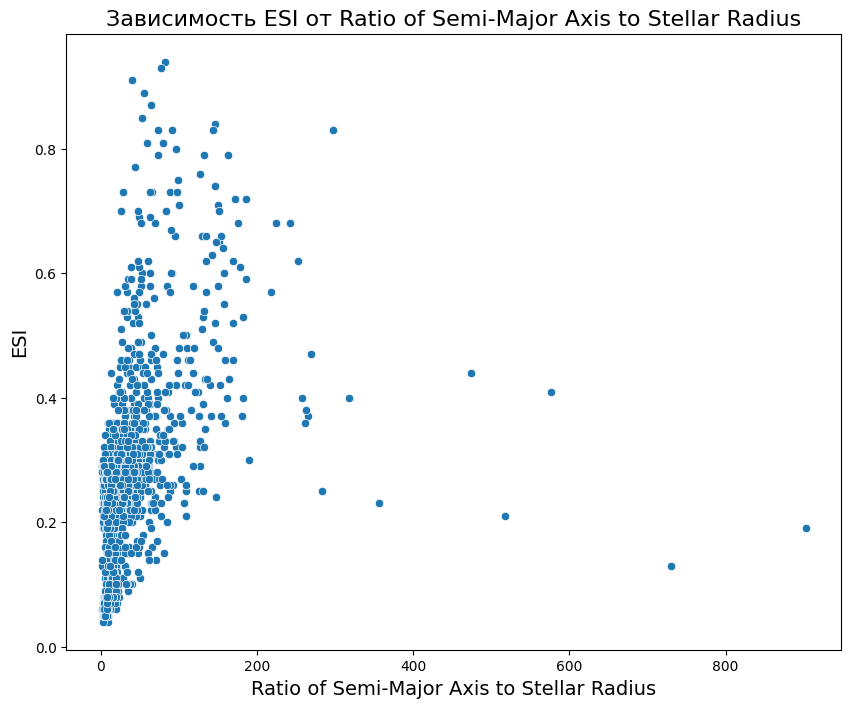

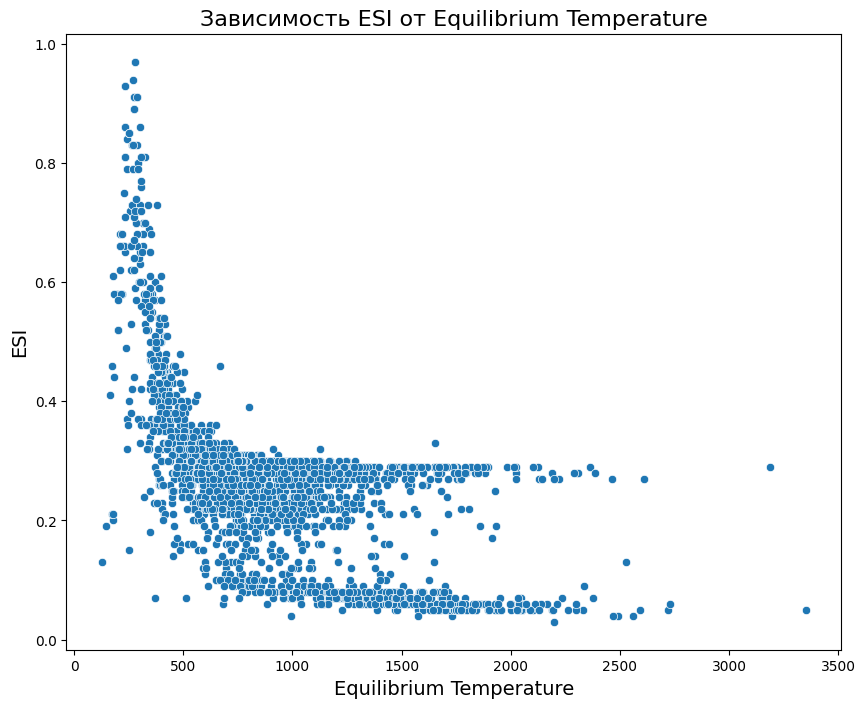

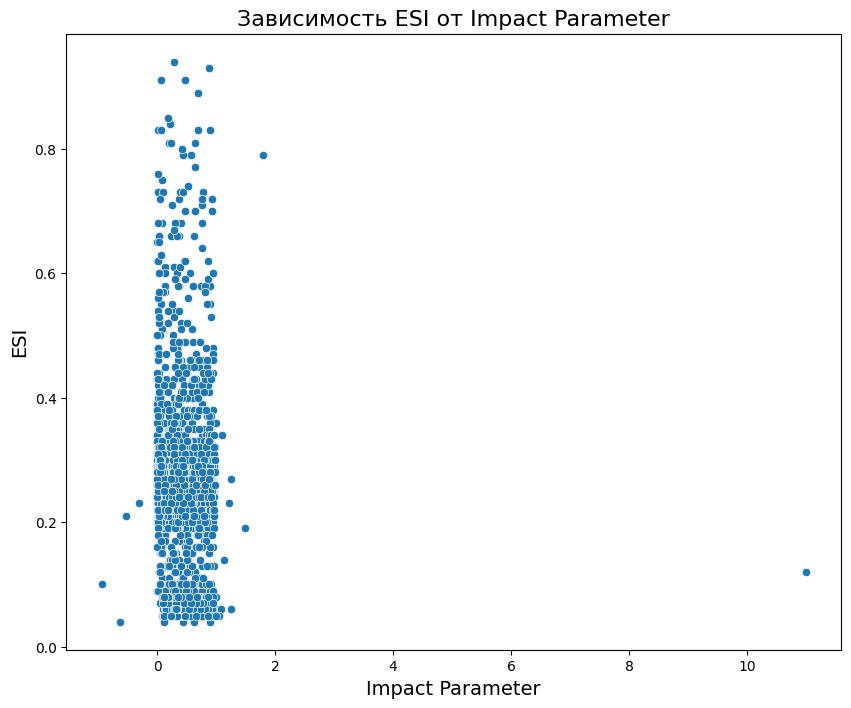

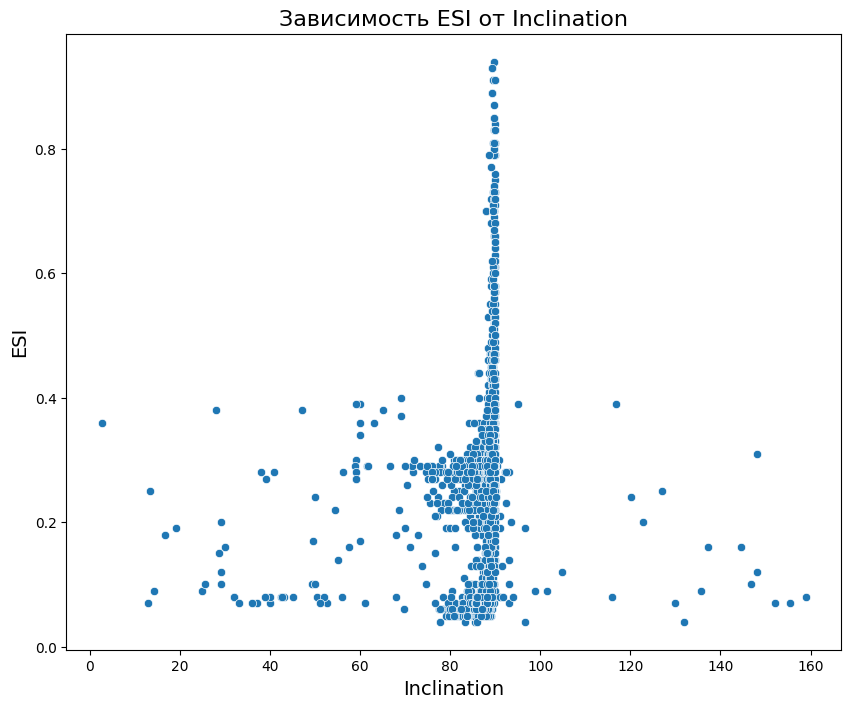

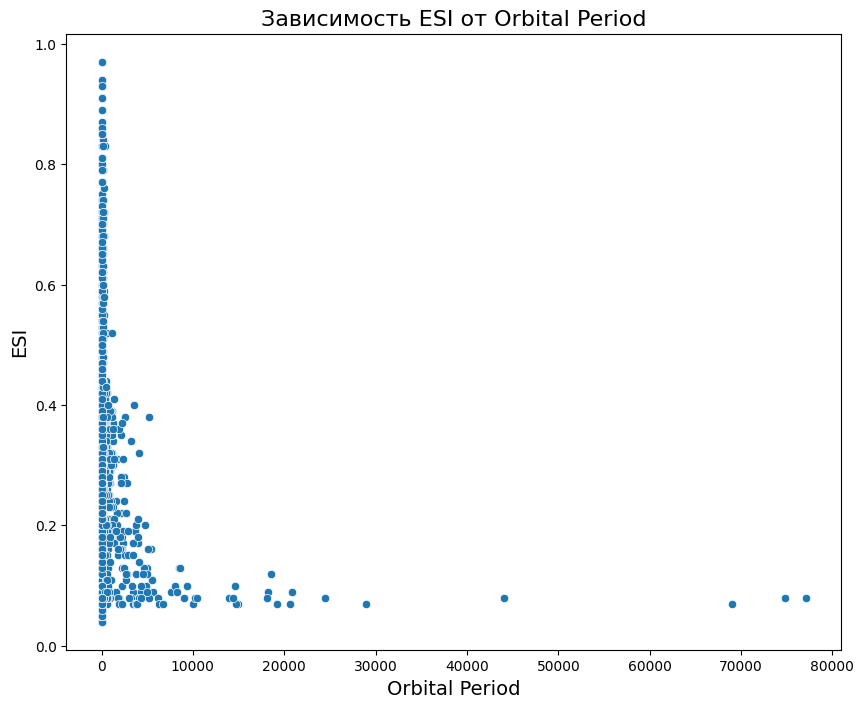

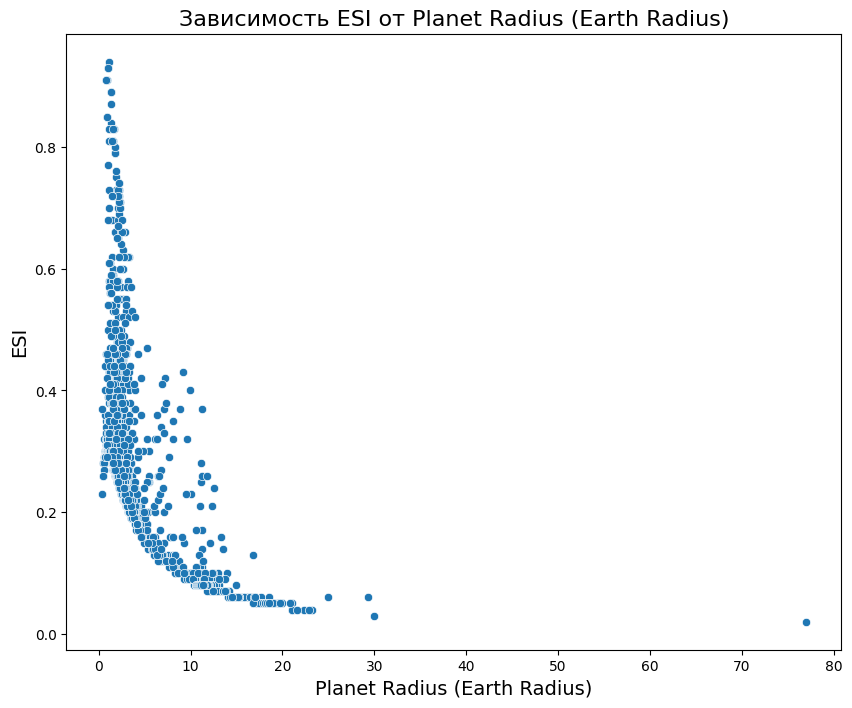

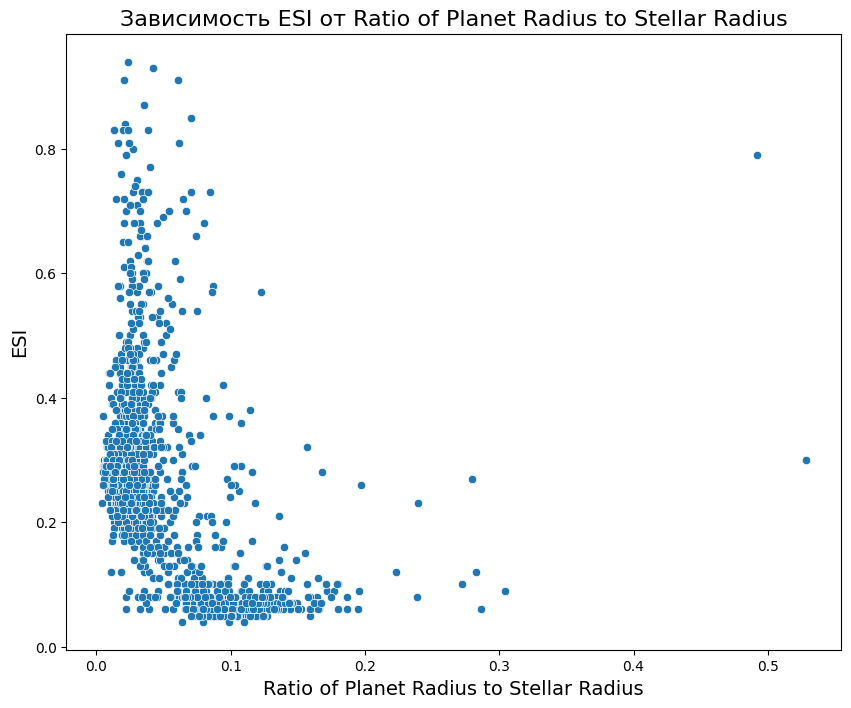

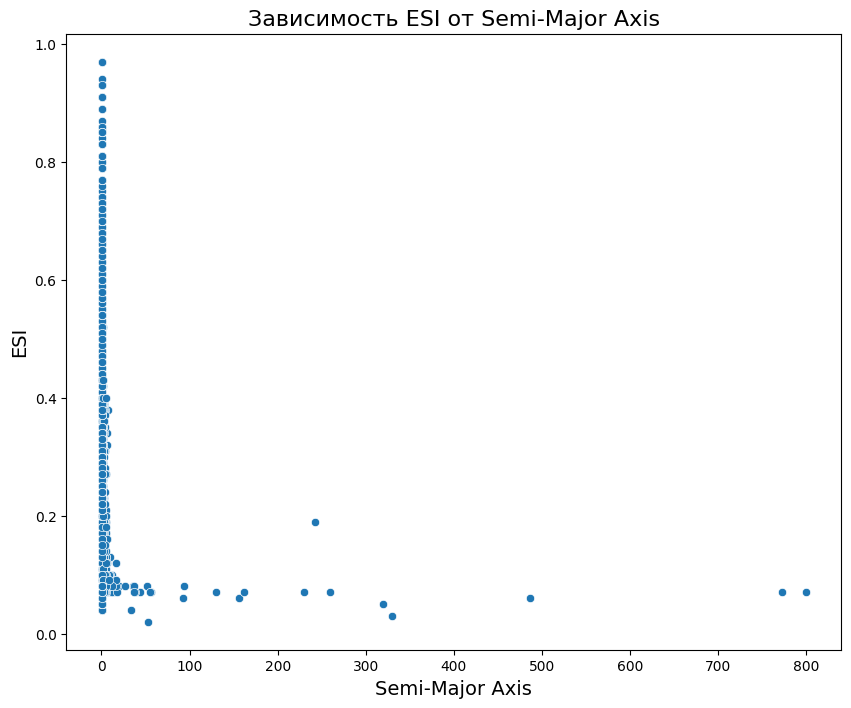

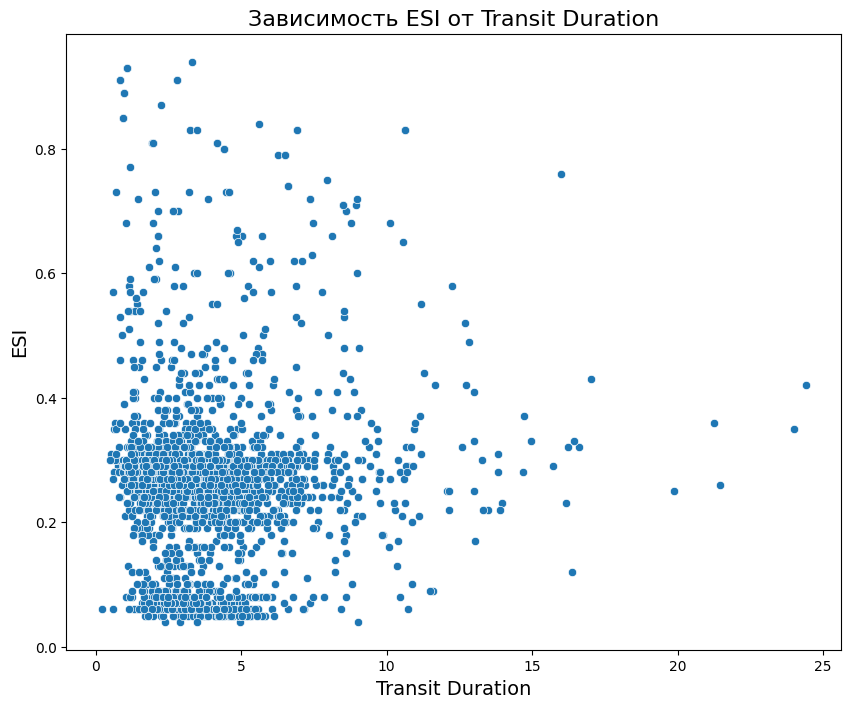

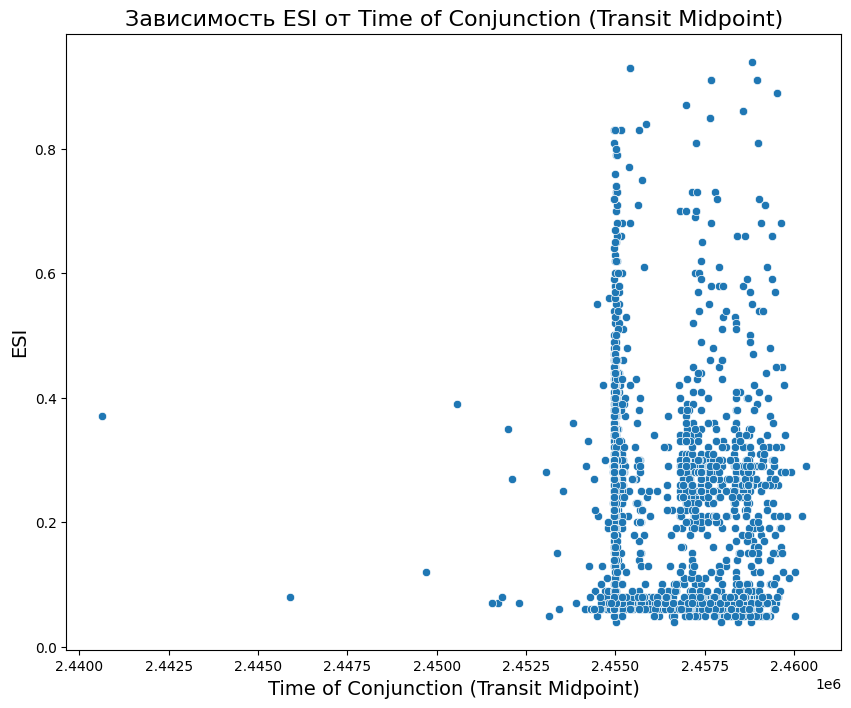

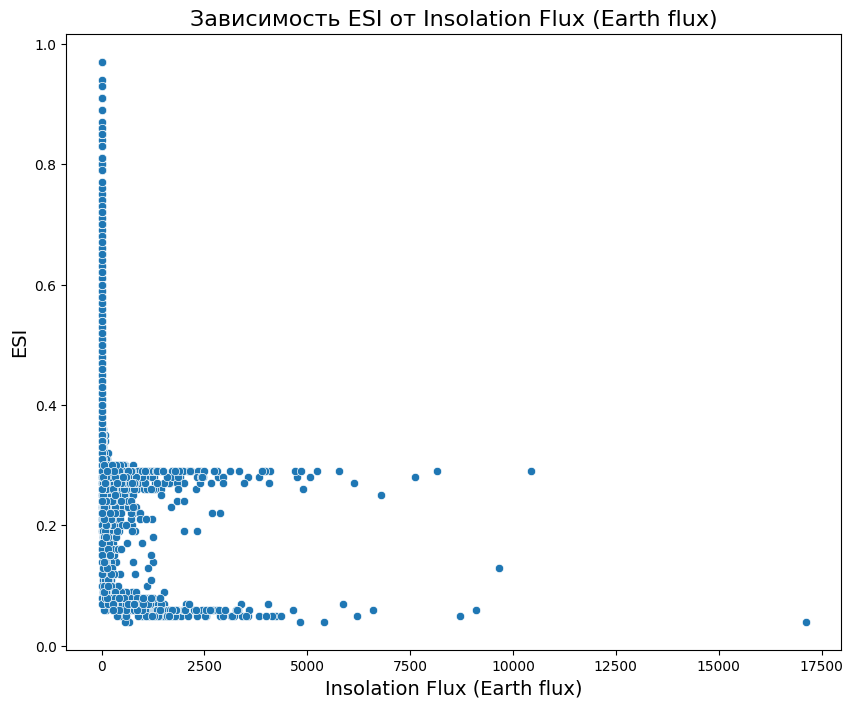

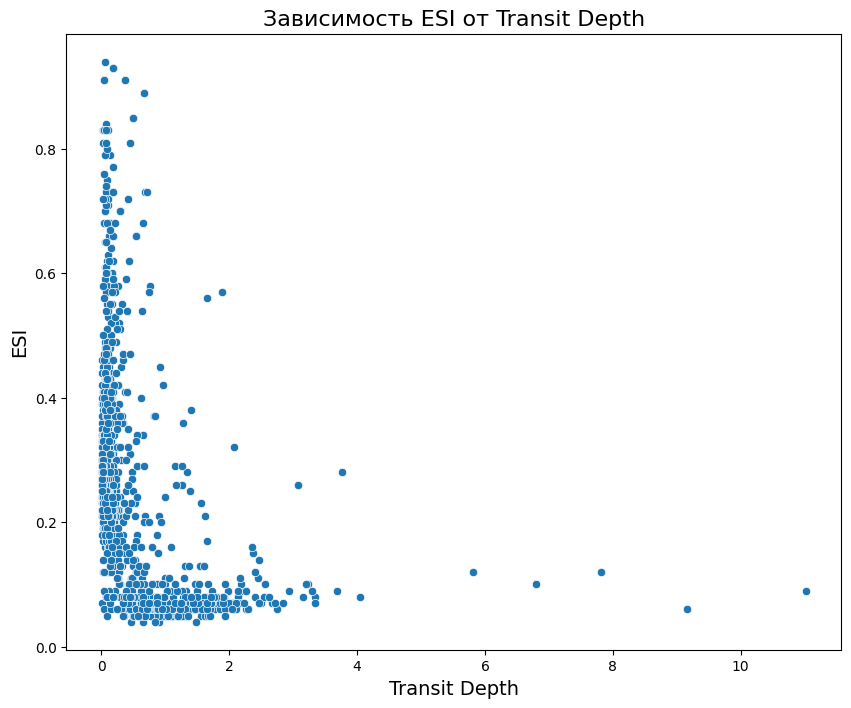

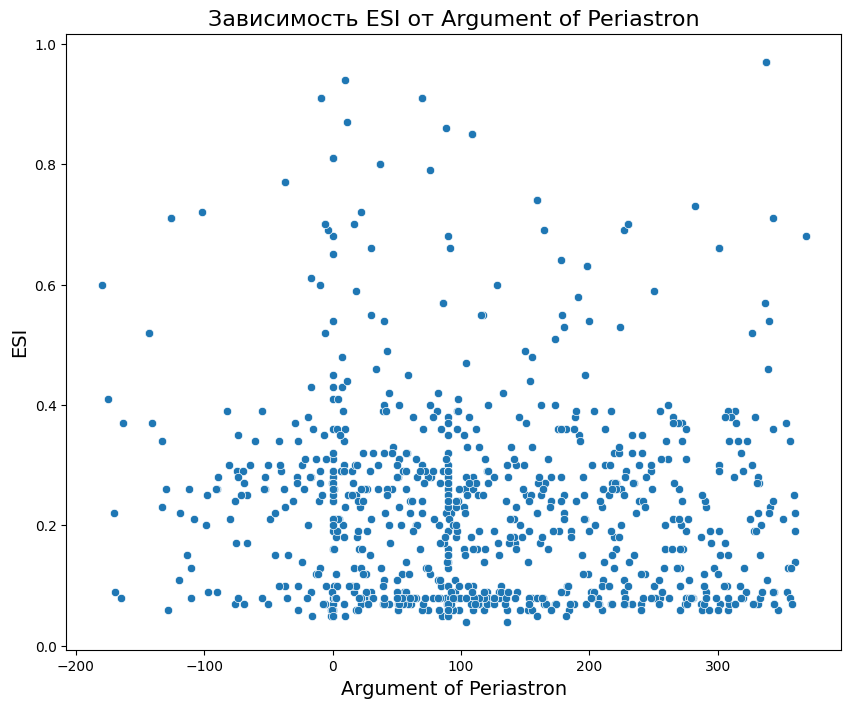

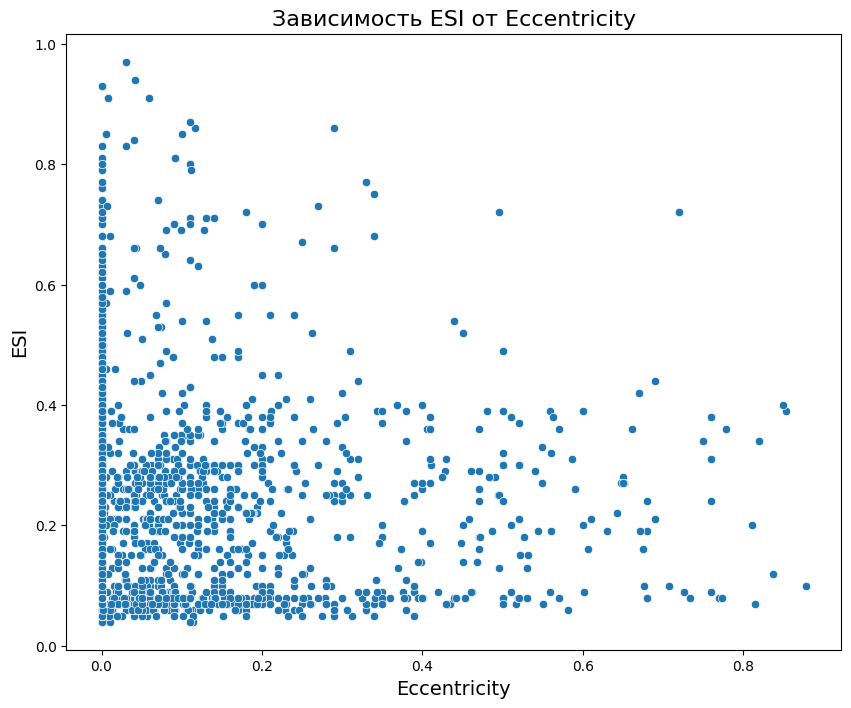

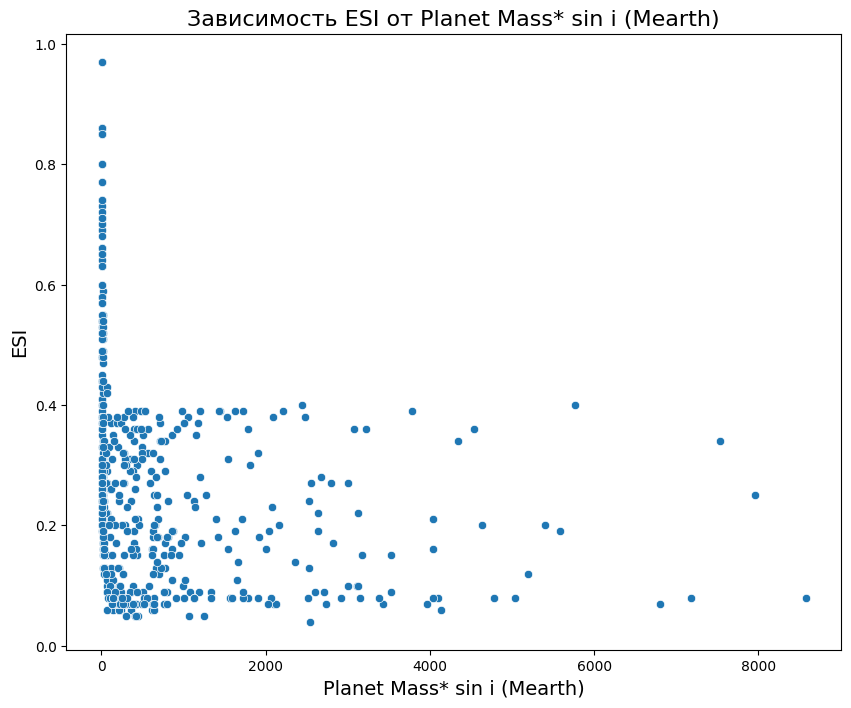

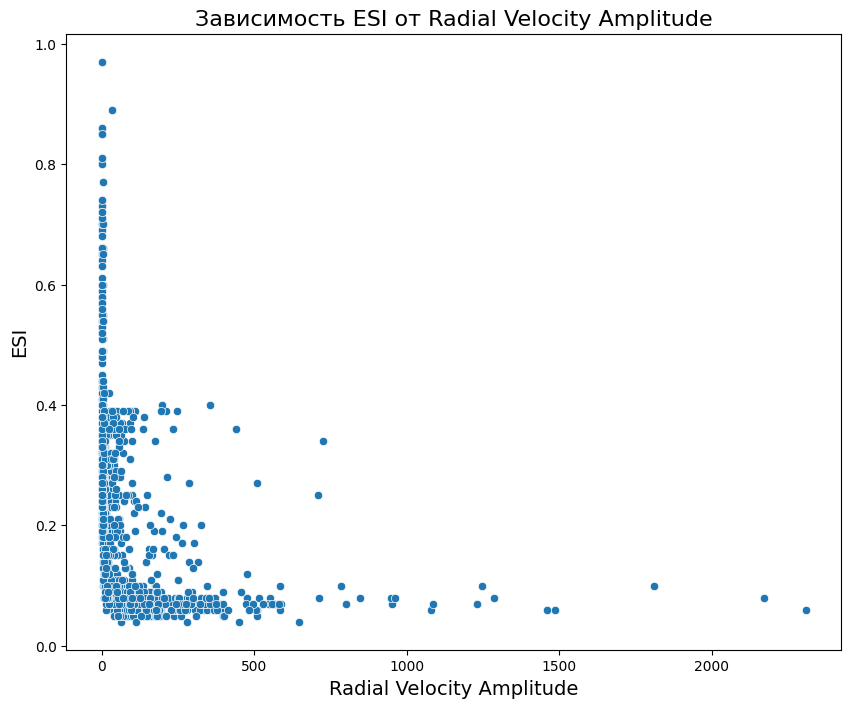

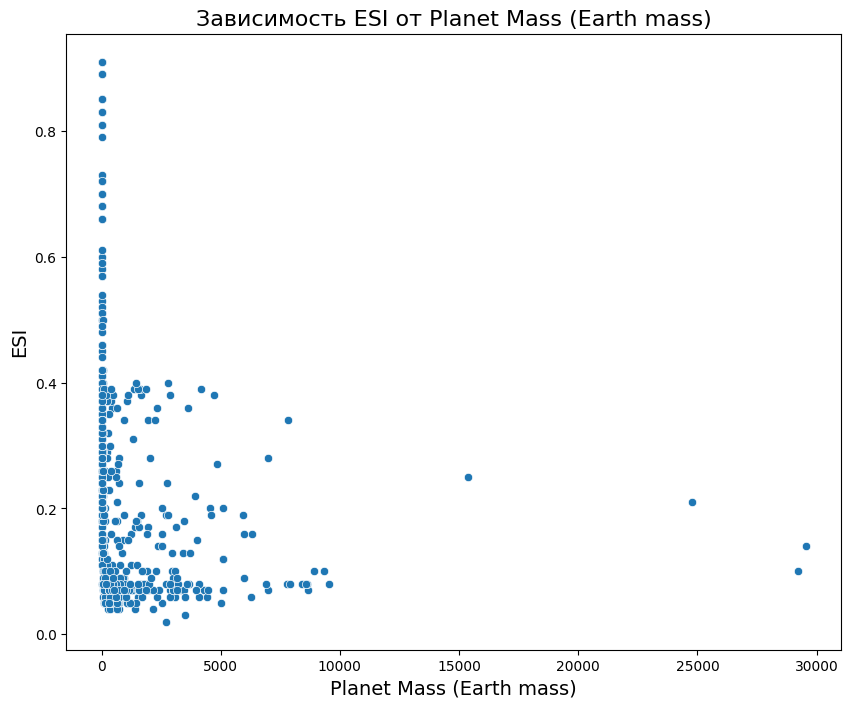

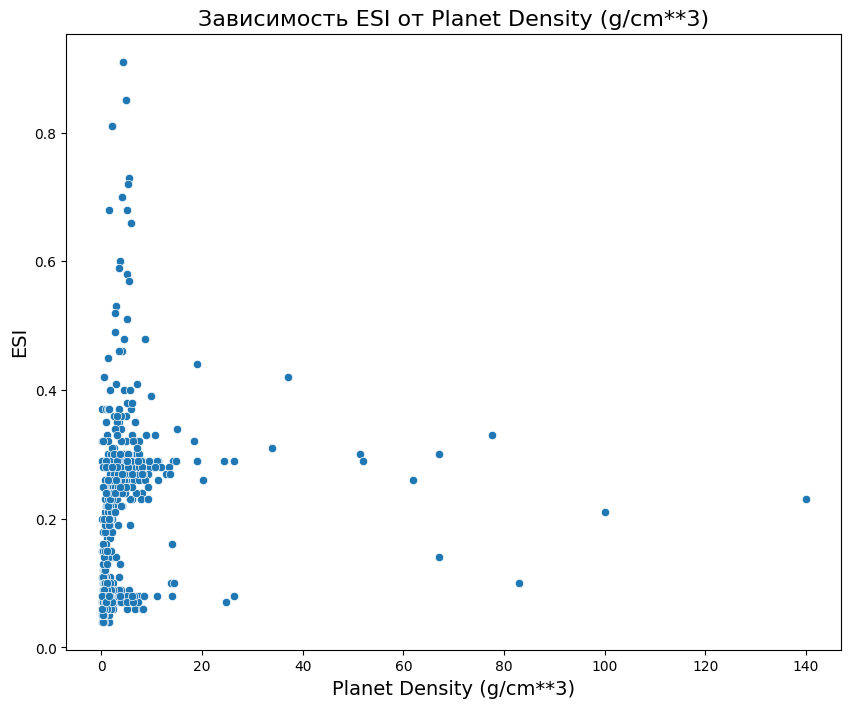

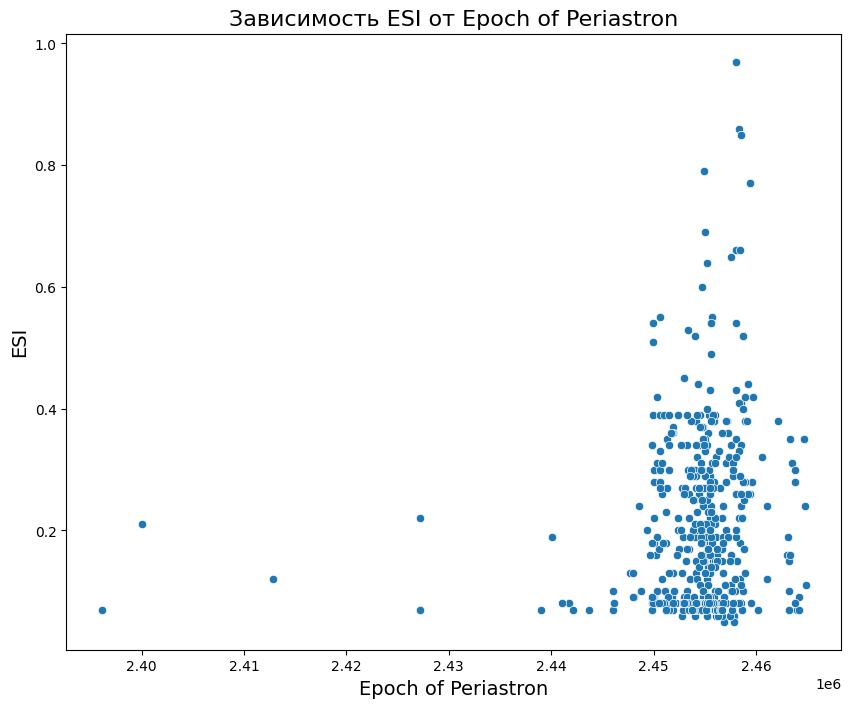

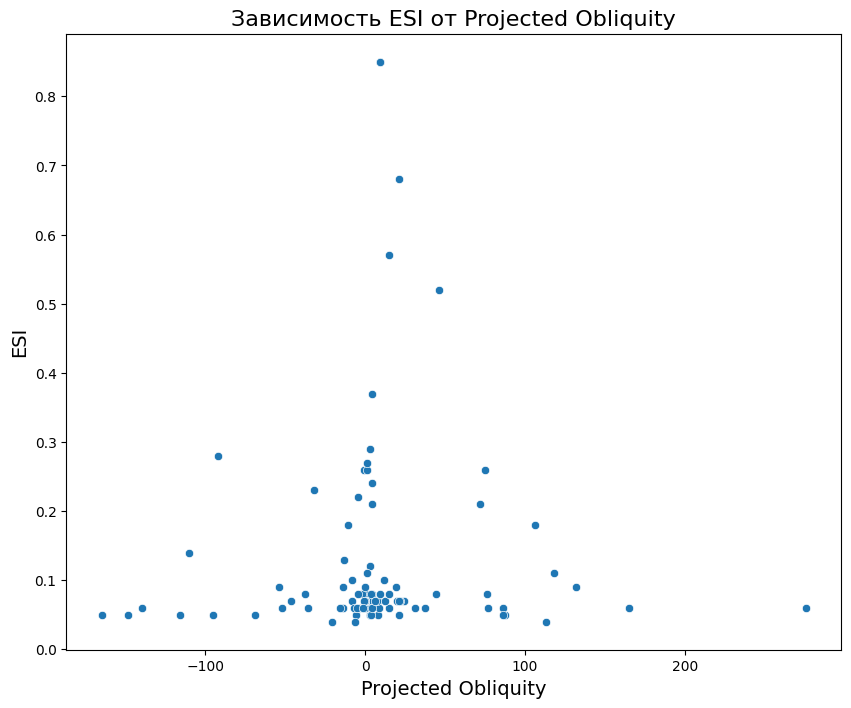

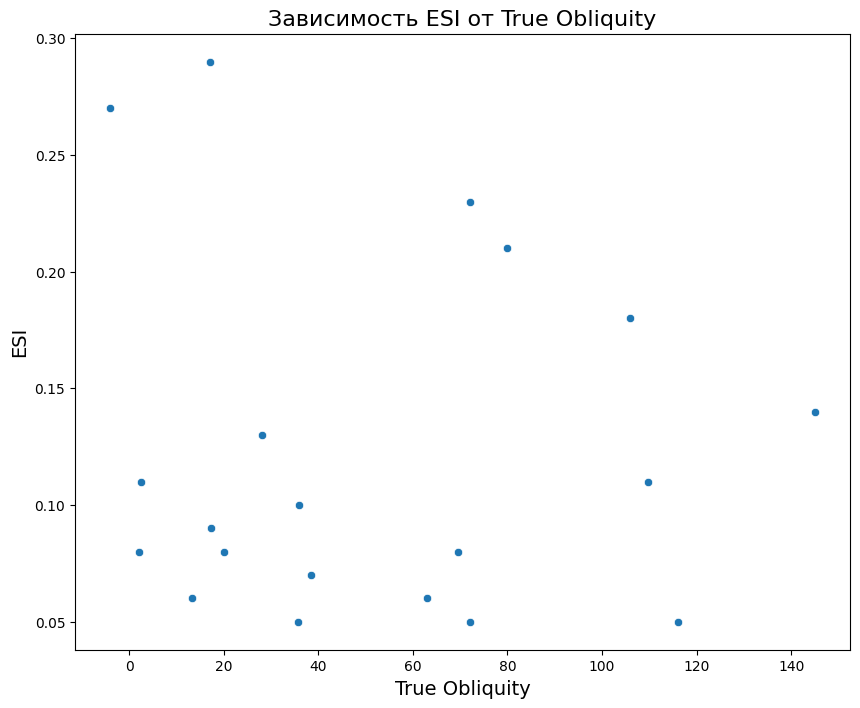

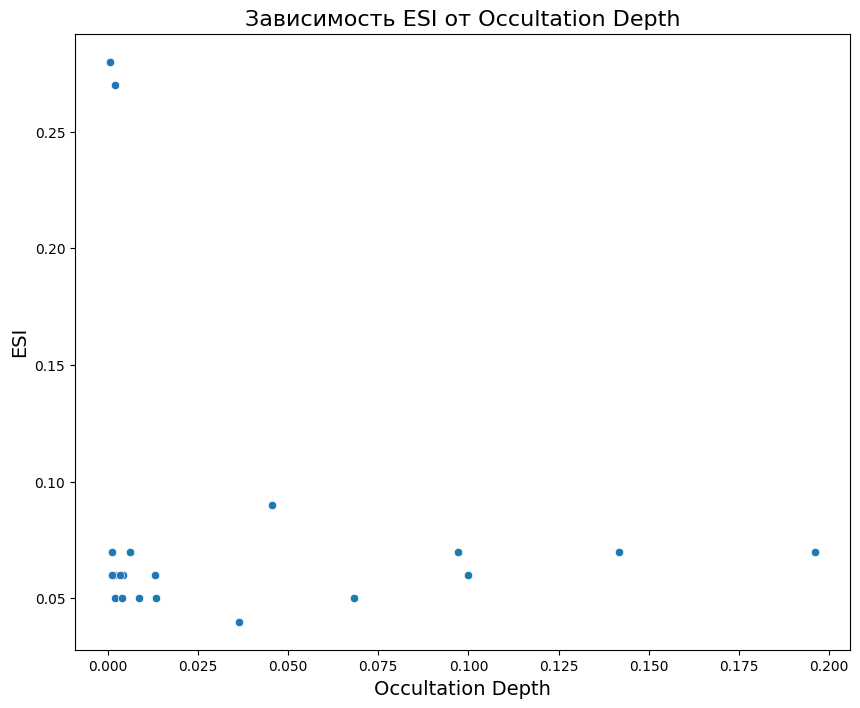

C:\Users\n-i-k\AppData\Local\Temp\ipykernel_21708\3368763061.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='ESI', hue='Тип планеты', fill=True)
C:\Users\n-i-k\AppData\Local\Temp\ipykernel_21708\3368763061.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='ESI', hue='Тип планеты', fill=True)
C:\Users\n-i-k\AppData\Local\Temp\ipykernel_21708\3368763061.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='ESI', hue='Тип планеты', fill=True)
C:\Users\n-i-k\AppData\Local\Temp\ipykernel_21708\3368763061.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='ESI', hue='Тип планеты', fill=True)
C:\Users\n-i-k\A

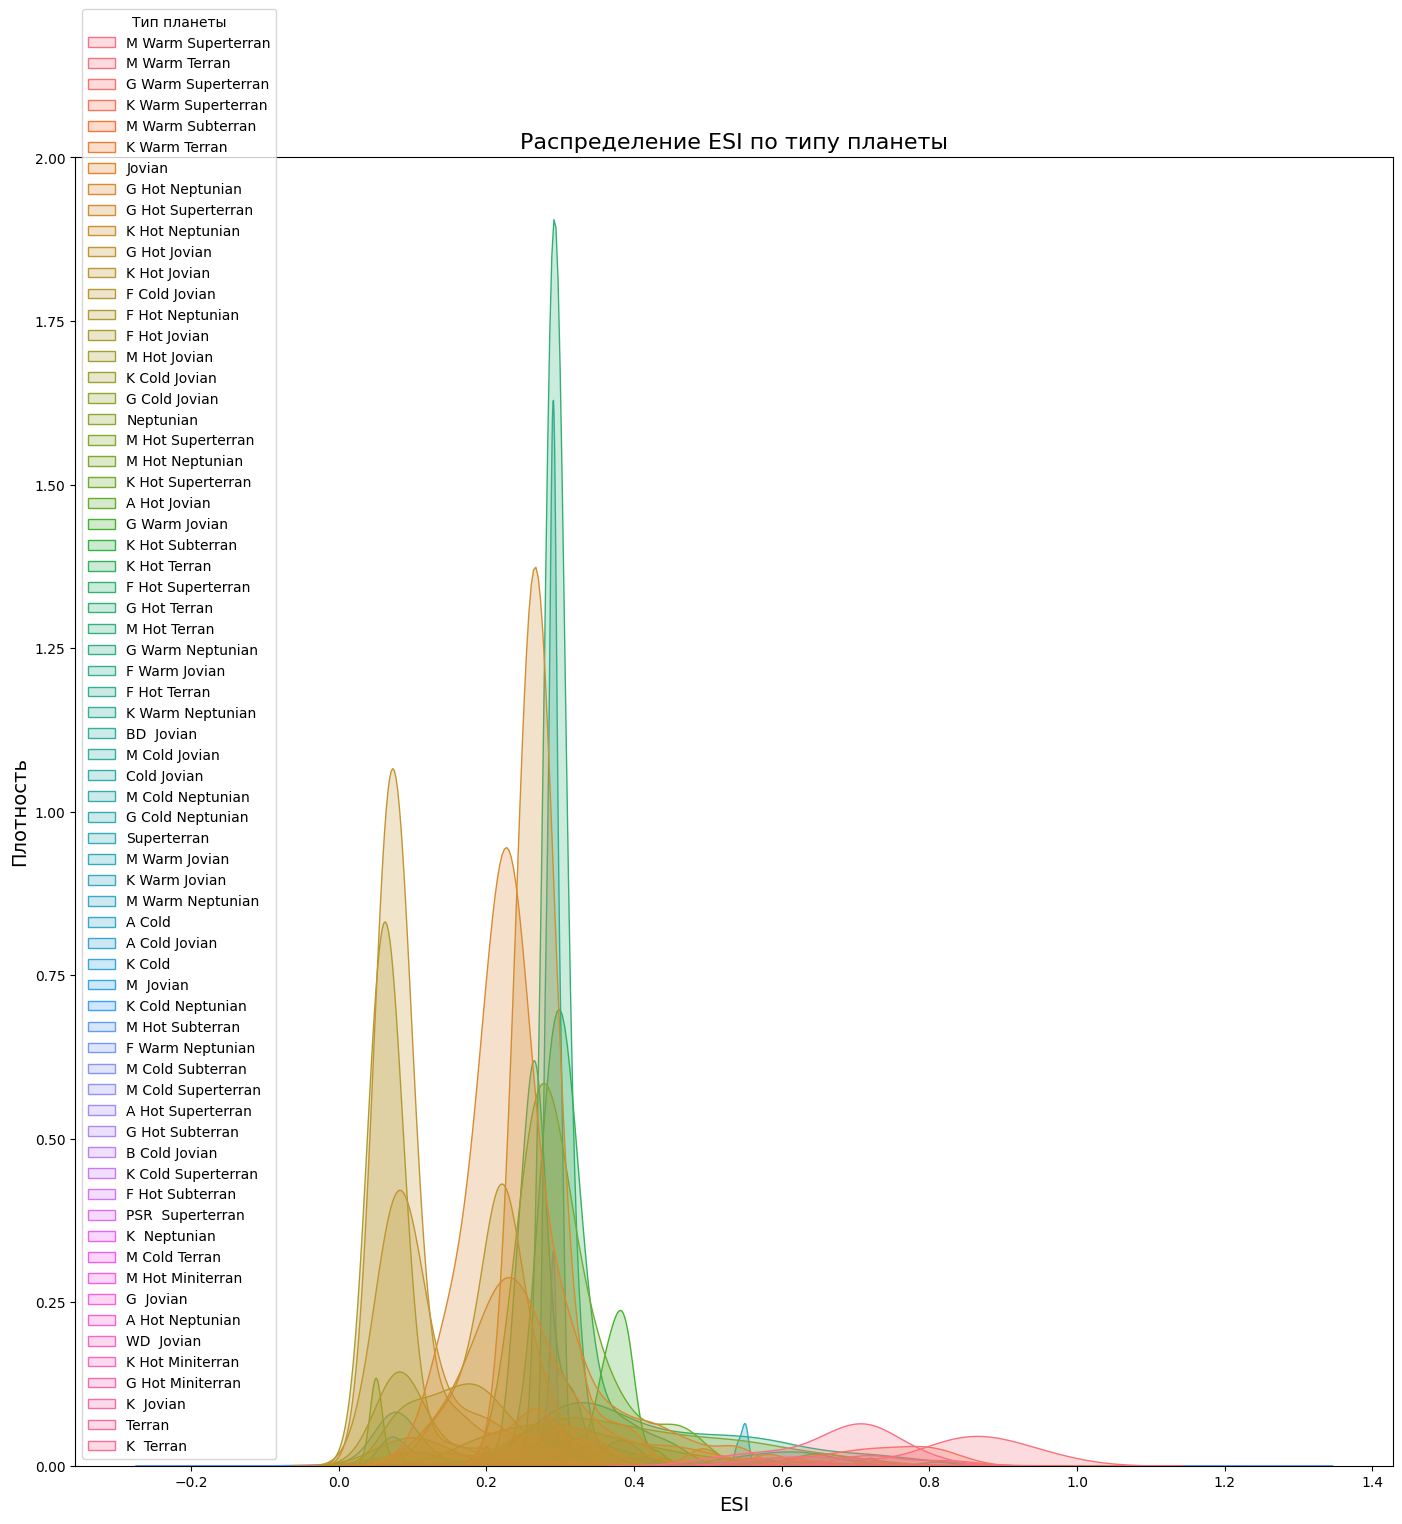

count     2774.000000
mean       379.231710
std       2976.433054
min          0.179719
25%          4.189229
50%         10.392433
75%         35.173431
max      77114.071580
Name: Orbital Period, dtype: float64


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('planet_data.csv')

columns_to_drop = [col for col in df.columns if 'Jupiter' in col or 'Mjup' in col]
df = df.drop(columns=columns_to_drop)

numeric_columns = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(35, 25))
heatmap = sns.heatmap(numeric_columns.corr(), annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 25})
plt.title('Корреляционная матрица', fontsize=30)
plt.xticks(rotation=45, ha='right', fontsize=25)
plt.yticks(rotation=0, fontsize=25)
plt.tight_layout()
plt.show()

for column in numeric_columns.columns:
    if column != 'ESI':
        plt.figure(figsize=(10, 8))
        sns.scatterplot(x=df[column], y=df['ESI'])
        plt.title(f'Зависимость ESI от {column}', fontsize=16)
        plt.xlabel(column, fontsize=14)
        plt.ylabel('ESI', fontsize=14)
        plt.show()

plt.figure(figsize=(17, 17))
sns.kdeplot(data=df, x='ESI', hue='Тип планеты', fill=True)
plt.title('Распределение ESI по типу планеты', fontsize=16)
plt.xlabel('ESI', fontsize=14)
plt.ylabel('Плотность', fontsize=14)
plt.show()

print(df['Orbital Period'].describe())


C:\Users\n-i-k\PycharmProjects\ML\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-04-08 22:36:20,405] A new study created in memory with name: no-name-04ee1f17-3efa-46e3-955b-237497be3ecb


Начальные метрики на тестовой выборке:
Средняя абсолютная ошибка (MAE): 0.03172274188963544
Коэффициент детерминации (R²): 0.8472922618405657


[I 2025-04-08 22:36:21,976] Trial 0 finished with value: 0.009523803353566642 and parameters: {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.046821906263983096, 'min_samples_split': 3, 'min_samples_leaf': 3, 'subsample': 0.9973032509947314, 'max_features': 0.747918019969707, 'alpha': 0.7135157116708939}. Best is trial 0 with value: 0.009523803353566642.
[I 2025-04-08 22:36:22,820] Trial 1 finished with value: 0.015258305550489498 and parameters: {'n_estimators': 96, 'max_depth': 7, 'learning_rate': 0.03522671131069414, 'min_samples_split': 7, 'min_samples_leaf': 3, 'subsample': 0.7705577384095712, 'max_features': 0.7727054237420021, 'alpha': 0.8017292285872578}. Best is trial 0 with value: 0.009523803353566642.
[I 2025-04-08 22:36:23,709] Trial 2 finished with value: 0.009774787598841875 and parameters: {'n_estimators': 92, 'max_depth': 8, 'learning_rate': 0.04912768427201839, 'min_samples_split': 5, 'min_samples_leaf': 4, 'subsample': 0.8377439494483205, 'max_features': 0.76

Лучшие гиперпараметры: {'n_estimators': 105, 'max_depth': 9, 'learning_rate': 0.04581135483226651, 'min_samples_split': 6, 'min_samples_leaf': 3, 'subsample': 0.954790620805873, 'max_features': 0.8140077704539135, 'alpha': 0.7154706537186827}


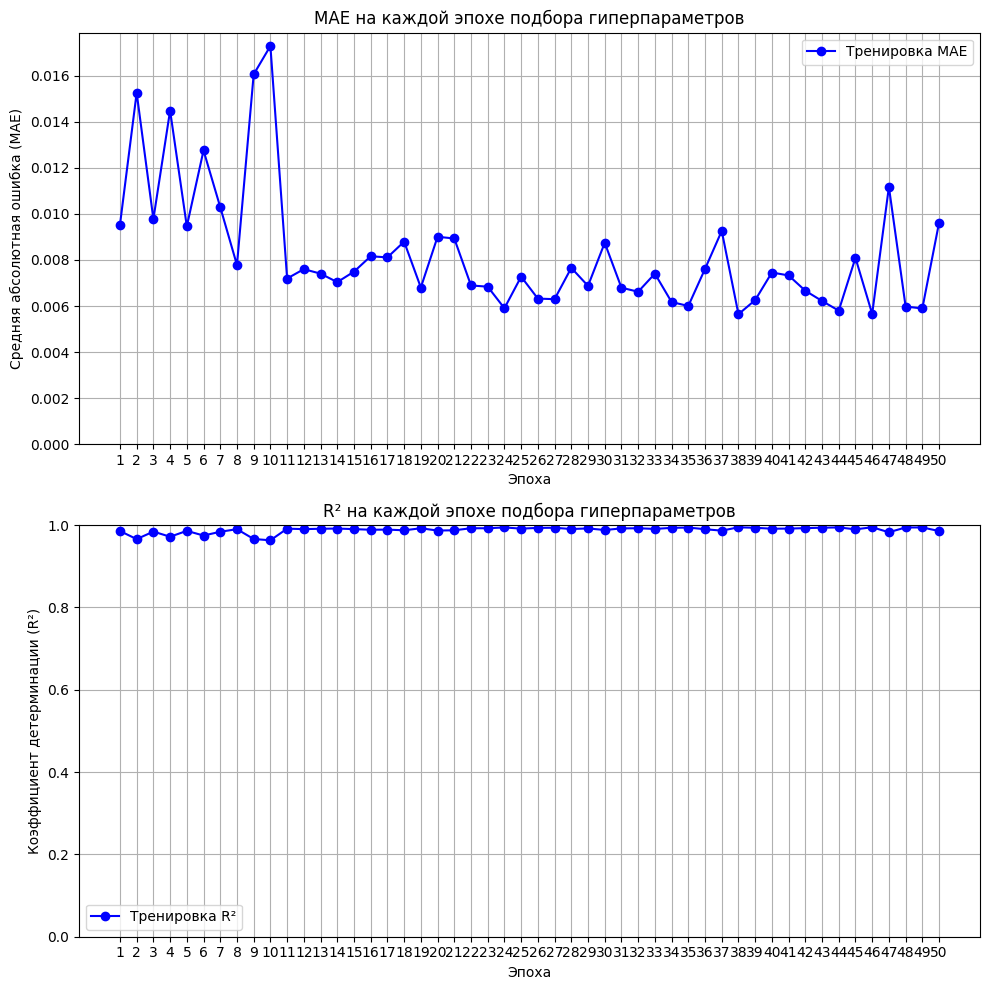

Лучшие метрики на обучающей выборке - Средняя абсолютная ошибка (MAE): 0.005644968895495669
Лучшие метрики на обучающей выборке - Коэффициент детерминации (R²): 0.9945824759819608
Лучшие метрики на валидационной выборке - Средняя абсолютная ошибка (MAE): 0.02357246545424886
Лучшие метрики на валидационной выборке - Коэффициент детерминации (R²): 0.8805753508250743


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import optuna
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('planet_data.csv')

le = LabelEncoder()
df['Название планеты код'] = le.fit_transform(df['Название планеты'])

df = pd.get_dummies(df, columns=[
    'Метод детектирования',
    'Тип планеты'
], drop_first=True)

df = df.select_dtypes(include=['float64', 'int64', 'int32'])

df.fillna(df.mean(), inplace=True)

X = df.drop(columns=['ESI'])
y = df['ESI']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

gbm_initial = GradientBoostingRegressor(random_state=42)
gbm_initial.fit(X_train, y_train)

y_test_pred_initial = gbm_initial.predict(X_test)
test_mae_initial = mean_absolute_error(y_test, y_test_pred_initial)
test_r2_initial = r2_score(y_test, y_test_pred_initial)

print(f"Начальные метрики на тестовой выборке:")
print(f"Средняя абсолютная ошибка (MAE): {test_mae_initial}")
print(f"Коэффициент детерминации (R²): {test_r2_initial}")

val_mae_list = []
train_mae_list = []
val_r2_list = []
train_r2_list = []

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 80, 125)
    max_depth = trial.suggest_int('max_depth', 7, 9)
    learning_rate = trial.suggest_float('learning_rate', 0.03, 0.05, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 3, 7)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 3, 4)
    subsample = trial.suggest_float('subsample', 0.75, 1.0, log=True)
    max_features = trial.suggest_float('max_features', 0.7, 1.0)
    alpha = trial.suggest_float('alpha', 0.6, 1.0)

    gbm = GradientBoostingRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        subsample=subsample,
        max_features=max_features,
        alpha=alpha,
        random_state=42
    )

    gbm.fit(X_train, y_train)

    y_train_pred = gbm.predict(X_train)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    train_mae_list.append(train_mae)
    train_r2_list.append(train_r2)

    return train_mae


study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

best_params = study.best_params
print(f"Лучшие гиперпараметры: {best_params}")

plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(range(1, len(train_mae_list) + 1), train_mae_list, marker='o', color='blue', label='Тренировка MAE')
plt.title('MAE на каждой эпохе подбора гиперпараметров')
plt.xlabel('Эпоха')
plt.ylabel('Средняя абсолютная ошибка (MAE)')
plt.legend()
plt.grid()
plt.xticks(range(1, len(train_mae_list) + 1))
plt.ylim(bottom=0)

plt.subplot(2, 1, 2)
plt.plot(range(1, len(train_r2_list) + 1), train_r2_list, marker='o', color='blue', label='Тренировка R²')
plt.title('R² на каждой эпохе подбора гиперпараметров')
plt.xlabel('Эпоха')
plt.ylabel('Коэффициент детерминации (R²)')
plt.legend()
plt.grid()
plt.xticks(range(1, len(train_r2_list) + 1))
plt.ylim(0, 1)

plt.tight_layout()
plt.show()


best_gbm = GradientBoostingRegressor(**best_params, random_state=42)
best_gbm.fit(X_train, y_train)

y_train_pred = best_gbm.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

y_val_pred = best_gbm.predict(X_val)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Лучшие метрики на обучающей выборке - Средняя абсолютная ошибка (MAE): {train_mae}")
print(f"Лучшие метрики на обучающей выборке - Коэффициент детерминации (R²): {train_r2}")
print(f"Лучшие метрики на валидационной выборке - Средняя абсолютная ошибка (MAE): {val_mae}")
print(f"Лучшие метрики на валидационной выборке - Коэффициент детерминации (R²): {val_r2}")

[I 2025-04-08 22:38:09,574] A new study created in memory with name: no-name-37d5145a-7fcd-4470-b63d-4f729aa5be8d
[I 2025-04-08 22:38:12,208] Trial 0 finished with value: 0.00863455295635626 and parameters: {'hidden_size': 46, 'learning_rate': 0.002633671197259891, 'epochs': 1273}. Best is trial 0 with value: 0.00863455295635626.
[I 2025-04-08 22:38:12,792] Trial 1 finished with value: 0.009287173906189099 and parameters: {'hidden_size': 22, 'learning_rate': 0.0011391361927115613, 'epochs': 548}. Best is trial 0 with value: 0.00863455295635626.
[I 2025-04-08 22:38:13,577] Trial 2 finished with value: 0.0852426943314565 and parameters: {'hidden_size': 30, 'learning_rate': 0.03431689023218639, 'epochs': 639}. Best is trial 0 with value: 0.00863455295635626.
[I 2025-04-08 22:38:15,641] Trial 3 finished with value: 0.012334459600870568 and parameters: {'hidden_size': 34, 'learning_rate': 0.005908303396081503, 'epochs': 1605}. Best is trial 0 with value: 0.00863455295635626.
[I 2025-04-08 2

Лучшие гиперпараметры: {'hidden_size': 4, 'learning_rate': 0.012921249581940514, 'epochs': 1580}
Обучающая выборка - MSE: 0.0062561472589029495, R²: 0.7213778549560123
Валидационная выборка - MSE: 0.0063682922005772165, R²: 0.6820918925849893


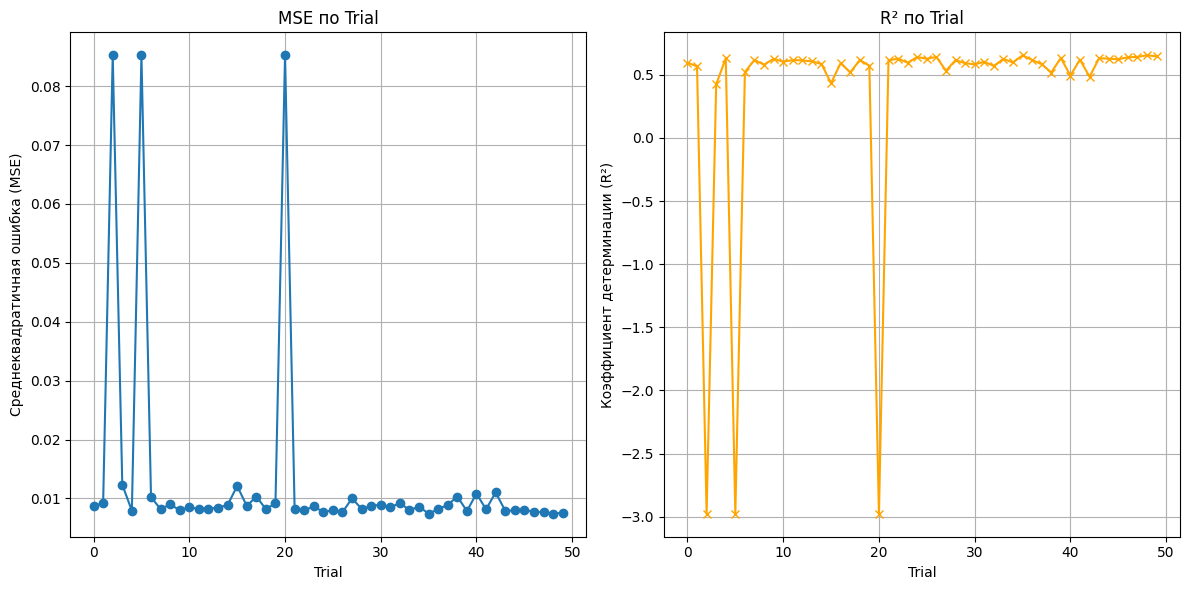

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import optuna
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import logging

logging.basicConfig(level=logging.INFO)

# Загрузка данных
df = pd.read_csv('planet_data.csv')

le = LabelEncoder()
df['Название планеты код'] = le.fit_transform(df['Название планеты'])

df = pd.get_dummies(df, columns=['Метод детектирования', 'Тип планеты'], drop_first=True)

df = df.select_dtypes(include=['float64', 'int64', 'int32'])

df.fillna(df.mean(), inplace=True)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['ESI']))

X = scaled_features
y = df['ESI'].values.reshape(-1, 1)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


class SimpleNN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01, regularization_lambda=0.001):
        self.weights_input_hidden = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size)
        self.learning_rate = learning_rate
        self.regularization_lambda = regularization_lambda

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def train(self, X, y, epochs, X_test=None, y_test=None):
        test_mse_list = []
        test_r2_list = []

        for epoch in range(epochs):
            hidden_input = np.dot(X, self.weights_input_hidden)
            hidden_output = self.sigmoid(hidden_input)
            final_input = np.dot(hidden_output, self.weights_hidden_output)
            final_output = self.sigmoid(final_input)

            error = y - final_output
            d_final_output = error * self.sigmoid_derivative(final_output)
            error_hidden_layer = d_final_output.dot(self.weights_hidden_output.T)
            d_hidden_layer = error_hidden_layer * self.sigmoid_derivative(hidden_output)

            self.weights_hidden_output += hidden_output.T.dot(
                d_final_output) * self.learning_rate - self.regularization_lambda * self.weights_hidden_output
            self.weights_input_hidden += X.T.dot(
                d_hidden_layer) * self.learning_rate - self.regularization_lambda * self.weights_input_hidden

            if X_test is not None and y_test is not None:
                y_test_pred = self.predict(X_test)
                test_mse = mean_squared_error(y_test, y_test_pred)
                test_r2 = r2_score(y_test, y_test_pred)

                test_mse_list.append(test_mse)
                test_r2_list.append(test_r2)

        return test_mse_list, test_r2_list

    def predict(self, X):
        hidden_input = np.dot(X, self.weights_input_hidden)
        hidden_output = self.sigmoid(hidden_input)
        final_input = np.dot(hidden_output, self.weights_hidden_output)
        final_output = self.sigmoid(final_input)
        return final_output


def objective(trial):
    hidden_size = trial.suggest_int('hidden_size', 1, 50)
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.05, log=True)
    epochs = trial.suggest_int('epochs', 500, 2000)

    nn = SimpleNN(input_size=X_train.shape[1], hidden_size=hidden_size, output_size=1, learning_rate=learning_rate)

    all_test_mse_list, all_test_r2_list = nn.train(X_train, y_train, epochs=epochs, X_test=X_test, y_test=y_test)

    trial.set_user_attr('mse_list', all_test_mse_list)
    trial.set_user_attr('r2_list', all_test_r2_list)

    return all_test_mse_list[-1]


study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

best_params = study.best_params
print(f"Лучшие гиперпараметры: {best_params}")

nn = SimpleNN(input_size=X_train.shape[1], hidden_size=best_params['hidden_size'], output_size=1,
              learning_rate=best_params['learning_rate'])
final_train_mse_list, final_train_r2_list = nn.train(X_train, y_train, best_params['epochs'], X_test=X_test,
                                                     y_test=y_test)

y_train_pred = nn.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

y_val_pred = nn.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Обучающая выборка - MSE: {train_mse}, R²: {train_r2}")
print(f"Валидационная выборка - MSE: {val_mse}, R²: {val_r2}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
x_labels = range(len(study.trials))
mse_values = [trial.user_attrs['mse_list'][-1] for trial in study.trials]
plt.plot(x_labels, mse_values, marker='o')
plt.title('MSE по Trial')
plt.xlabel('Trial')
plt.ylabel('Среднеквадратичная ошибка (MSE)')
plt.grid()

plt.subplot(1, 2, 2)
r2_values = [trial.user_attrs['r2_list'][-1] for trial in study.trials]
plt.plot(x_labels, r2_values, marker='x', color='orange')
plt.title('R² по Trial')
plt.xlabel('Trial')
plt.ylabel('Коэффициент детерминации (R²)')
plt.grid()

plt.tight_layout()
plt.show()

# Лучшие гиперпараметры: {'hidden_size': 8, 'learning_rate': 0.013063177417863642, 'epochs': 1433}
# Обучающая выборка - MSE: 0.006077052149723948, R²: 0.7293539880969528
# Валидационная выборка - MSE: 0.006604204339071515, R²: 0.6703150489504978